## Import library

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#import xgboost as xgb

from sklearn.decomposition import PCA
from sklearn.neural_network import MLPRegressor 
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

## Import Data

In [14]:
#mydata = pd.read_excel('/content/ReceiveCR.xlsx')
mydata = pd.read_excel('/home/fil100/Downloads/24h.xlsx')
mydata

,Time,CPU edge average (1),CPU edge average (2),CPU server average,BW edge (1),BW edge (1).1,BW server (1),BW server (2),# edge device,# links (1),# links (2),# VNF Density current,# VNF Receive current,# VNF Density future,# VNF Receive Future
0,0,0.000000,0.000000,0.000,0.000000,0.000000,0.000000,0.000000,0,0,0,0,0,0,80
1,1,6.560000,29.818182,1.600,0.160000,0.727273,16.000000,12.000000,66,3,4,0,80,0,104
2,2,8.528000,30.098824,2.080,0.208000,0.734118,20.800000,15.600000,85,3,4,0,104,0,98
3,3,8.036000,28.700000,1.960,0.196000,0.700000,19.600000,14.700000,84,3,4,0,98,0,115
4,4,9.430000,29.164948,2.300,0.230000,0.718750,23.000000,17.250000,97,3,4,0,115,0,162
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2395,19,68.732000,69.193289,50.884,52.662267,52.838395,553.454194,485.085556,298,31,36,914,1350,729,1182
2396,20,63.316000,64.389153,42.720,42.735700,43.460034,480.642414,406.962000,295,29,35,729,1182,512,978
2397,21,56.478667,58.831944,32.986,30.750033,31.920450,364.050357,297.233429,288,28,35,512,978,346,788
2398,22,48.477333,50.850350,24.858,21.464767,22.594491,278.870385,210.706000,286,26,35,346,788,198,534


In [15]:
mydata.columns

Index(['Time ', 'CPU edge average (1)', 'CPU edge average (2)',
       'CPU server average', 'BW edge (1)', 'BW edge (1).1', 'BW server (1)',
       'BW server (2)', '# edge device', '# links (1)', '# links (2)',
       '# VNF Density current', '# VNF Receive current',
       '# VNF Density future', '# VNF Receive Future'],
      dtype='object')

## Density Data

In [16]:
mydata.drop(columns=['# VNF Receive current','# VNF Receive Future'], inplace=True)
mydata

,Time,CPU edge average (1),CPU edge average (2),CPU server average,BW edge (1),BW edge (1).1,BW server (1),BW server (2),# edge device,# links (1),# links (2),# VNF Density current,# VNF Density future
0,0,0.000000,0.000000,0.000,0.000000,0.000000,0.000000,0.000000,0,0,0,0,0
1,1,6.560000,29.818182,1.600,0.160000,0.727273,16.000000,12.000000,66,3,4,0,0
2,2,8.528000,30.098824,2.080,0.208000,0.734118,20.800000,15.600000,85,3,4,0,0
3,3,8.036000,28.700000,1.960,0.196000,0.700000,19.600000,14.700000,84,3,4,0,0
4,4,9.430000,29.164948,2.300,0.230000,0.718750,23.000000,17.250000,97,3,4,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2395,19,68.732000,69.193289,50.884,52.662267,52.838395,553.454194,485.085556,298,31,36,914,729
2396,20,63.316000,64.389153,42.720,42.735700,43.460034,480.642414,406.962000,295,29,35,729,512
2397,21,56.478667,58.831944,32.986,30.750033,31.920450,364.050357,297.233429,288,28,35,512,346
2398,22,48.477333,50.850350,24.858,21.464767,22.594491,278.870385,210.706000,286,26,35,346,198


## Train Test Split


In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(
    mydata.drop(columns='# VNF Density future'),
    mydata['# VNF Density future'],
    test_size=0.25, random_state=42, shuffle=False)

X_train

,Time,CPU edge average (1),CPU edge average (2),CPU server average,BW edge (1),BW edge (1).1,BW server (1),BW server (2),# edge device,# links (1),# links (2),# VNF Density current
0,0,0.000000,0.000000,0.000,0.000000,0.000000,0.000000,0.000000,0,0,0,0
1,1,6.560000,29.818182,1.600,0.160000,0.727273,16.000000,12.000000,66,3,4,0
2,2,8.528000,30.098824,2.080,0.208000,0.734118,20.800000,15.600000,85,3,4,0
3,3,8.036000,28.700000,1.960,0.196000,0.700000,19.600000,14.700000,84,3,4,0
4,4,9.430000,29.164948,2.300,0.230000,0.718750,23.000000,17.250000,97,3,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1795,19,74.214000,74.214000,57.718,60.818900,60.818900,687.475172,575.876000,300,29,35,1062
1796,20,65.156000,65.373913,45.936,46.948167,47.105184,534.004138,450.654857,299,29,35,803
1797,21,55.400000,57.708333,35.070,34.198667,35.256357,422.734444,331.547143,288,27,35,575
1798,22,45.498000,50.366790,25.848,23.698700,25.666462,305.009231,231.124571,271,26,35,393


## Standard Scaler ( Nếu model tree-based thì chả cần )

In [ ]:
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)

## Spot Check Algorithm (RF, LR, GB)

In [20]:
models = []
models.append(('LR', LinearRegression()))
models.append(('RF',RandomForestRegressor(random_state=42)))
models.append(('GBM',GradientBoostingRegressor(random_state=42)))

results = []
names = []
for name, model in models:
    kfold = KFold(n_splits=10, random_state=7, shuffle=True)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring="neg_root_mean_squared_error", n_jobs=-1)
    cv_results2 = cross_val_score(model, X_train, Y_train, cv=kfold, scoring="r2", n_jobs=-1)
    model.fit(X_train,Y_train)
    val = mean_squared_error(Y_test,model.predict(X_test),squared=False)
    train = mean_squared_error(Y_train,model.predict(X_train),squared=False)
    train_r2 = r2_score(Y_train, model.predict(X_train))
    val_r2 = r2_score(Y_test, model.predict(X_test))
    #results.append(cv_results)
    names.append(name)
    msg = "%s: \n Cross-validation RMSE: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)
    msg2 = " Cross-validation R2: %f (%f)" % (cv_results2.mean(), cv_results2.std())
    print(msg2)
    # print(cv_results)
    print(" Training Error: ",train, train_r2)
    print(" Validation Error:", val, val_r2)


LR: 
 Cross-validation RMSE: -65.188524 (4.043004)
 Cross-validation R2: 0.975607 (0.003449)
 Training Error:  64.72284840512236 0.9763033655626253
 Validation Error: 63.107638425133466 0.977622652098939
RF: 
 Cross-validation RMSE: -23.750831 (2.458739)
 Cross-validation R2: 0.996752 (0.000647)
 Training Error:  8.937040983331313 0.9995481867907301
 Validation Error: 23.266162518580018 0.996958454823086
GBM: 
 Cross-validation RMSE: -23.741720 (3.054562)
 Cross-validation R2: 0.996733 (0.000865)
 Training Error:  19.374140185574383 0.9978766758441612
 Validation Error: 24.09573823521142 0.996737689980968


## Random Forest Regressor

In [7]:
# Tuning RF for best parameter

param_grid = dict(n_estimators=np.array([10,25,50,75]),
                  #criterion=[ 'absolute_error', 'poisson'],
                  #max_depth=[None,2,3,5],
                  min_samples_split=[2,5,10,20,30,40,50],
                  min_samples_leaf=[2,5,10,20,40,50,30],
                  bootstrap=[True,False],
                  #ccp_alpha=[0,10000,20000],
                  #oob_score=[True,False],
                  max_features=['auto','sqrt', 'log2'])

model = RandomForestRegressor(random_state=42)
kfold = KFold(n_splits=10, random_state=42,shuffle=True)
scoring = 'neg_root_mean_squared_error'
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold, n_jobs=1)
grid_result = grid.fit(X_train, Y_train)

In [8]:
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
values = {}
value_index = 0
for mean, stdev, param in zip(means, stds, params):
  model.set_params(**param)
  model.fit(X_train,Y_train)
  val1 = mean_squared_error(Y_test, model.predict(X_test),squared=False)
  train1 = mean_squared_error(Y_train, model.predict(X_train),squared=False) 
  print("%f (%f) with: %r, %f %f" % (mean, stdev, param, train1, val1))
  values[value_index] = [mean,train1,val1]
  value_index += 1

# RF Best: -21.620768 using {'max_depth': 5, 'max_features': 'log2', 'n_estimators': 50}
# Second EF Best: -21.669385 using {'max_depth': 5, 'max_features': 'log2', 'n_estimators': 50}
# -49.545914 (4.781597) with: {'bootstrap': True, 'max_features': 'log2', 'min_samples_leaf': 10, 'min_samples_split': 2, 'n_estimators': 25}, 40.690077 51.512302

Best: -23.017282 using {'bootstrap': True, 'max_features': 'auto', 'min_samples_leaf': 5, 'min_samples_split': 20, 'n_estimators': 75}
-24.691821 (1.055993) with: {'bootstrap': True, 'max_features': 'auto', 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 10}, 11.864644 24.198361
-24.120998 (0.981077) with: {'bootstrap': True, 'max_features': 'auto', 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 25}, 11.391639 23.639144
-23.919961 (0.880450) with: {'bootstrap': True, 'max_features': 'auto', 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 50}, 10.964148 23.251218
-23.781972 (0.926103) with: {'bootstrap': True, 'max_features': 'auto', 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 75}, 10.864438 23.166799
-24.617174 (1.225221) with: {'bootstrap': True, 'max_features': 'auto', 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 10}, 12.487479 23.959409
-24.020464 (1.082133) with: {'bootstrap': True, 'max_features': '

In [9]:
values
values_RF = pd.DataFrame.from_dict(values, orient='index', columns = ['CV','Train','Val'])
values_RF.to_csv("~/khoa/GridRFwithTimeDensity.csv", index=False)

In [22]:
from sklearn.metrics import r2_score

FinalModelRF = RandomForestRegressor(random_state=42)
#FinalModelRF = RandomForestRegressor()
paramss = {'bootstrap': True, 'max_features': 'auto', 'min_samples_leaf': 20, 'min_samples_split': 30, 'n_estimators': 75}
FinalModelRF.set_params(**paramss)
#FinalModel = GradientBoostingRegressor(criterion='mae',max_depth=3,max_features='sqrt',n_estimators=100)
print(FinalModelRF)
FinalModelRF.fit(X_train,Y_train)
val = mean_squared_error(Y_test, FinalModelRF.predict(X_test),squared=False)
val_r2 = r2_score(Y_test, FinalModelRF.predict(X_test))
train = mean_squared_error(Y_train, FinalModelRF.predict(X_train),squared=False) 
train_r2 = r2_score(Y_train, FinalModelRF.predict(X_train))

print(" Training Error: ",train, train_r2)
print(" Validation Error:", val, val_r2)


RandomForestRegressor(min_samples_leaf=20, min_samples_split=30,
                      n_estimators=75, random_state=42)
 Training Error:  21.458721281891894 0.9973951716934463
 Validation Error: 22.93570504356407 0.997044241504487


In [ ]:
from sklearn.metrics import r2_score

FinalModelRF = RandomForestRegressor()
#FinalModel = GradientBoostingRegressor(criterion='mae',max_depth=3,max_features='sqrt',n_estimators=100)
FinalModelRF.fit(X_train,Y_train)
val = mean_squared_error(Y_test, FinalModelRF.predict(X_test),squared=False)
val_r2 = r2_score(Y_test, FinalModelRF.predict(X_test))
train = mean_squared_error(Y_train, FinalModelRF.predict(X_train),squared=False) 
train_r2 = r2_score(Y_test, FinalModelRF.predict(X_test))

print(" Training Error: ",train, train_r2)
print(" Validation Error:", val, val_r2)


 Training Error:  8.512938340007377 0.9989781430059633
 Validation Error: 22.177079771076034 0.9989781430059633


## Gradient Boosting Regressor

In [10]:
# Tuning GBM for best value

from sklearn.ensemble import GradientBoostingRegressor

param_grid = dict(n_estimators=np.array([25,50,100]),
                  criterion=['friedman_mse', 'squared_error'],
                  max_depth=[3,5,7,9],
                  max_features=['auto','sqrt', 'log2'],
                  learning_rate=[0.1,0.2,0.5],
                  #loss = ['huber', 'quantile'])
                  loss=['squared_error', 'absolute_error', 'huber', 'quantile'],
                  min_samples_split= [2,5,10,20],
                  min_samples_leaf = [2,5,10,20])
model = GradientBoostingRegressor(random_state=42)#,max_features='auto')
kfold = KFold(n_splits=10, random_state=7,shuffle=True)
scoring = 'neg_root_mean_squared_error'
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold, n_jobs=-1)
grid_result = grid.fit(X_train, Y_train)

In [11]:
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
values = {}
value_index = 0
for mean, stdev, param in zip(means, stds, params):
  model.set_params(**param)
  model.fit(X_train,Y_train)
  val1 = mean_squared_error(Y_test, model.predict(X_test),squared=False)
  train1 = mean_squared_error(Y_train, model.predict(X_train),squared=False) 
  print("%f (%f) with: %r, %f %f" % (mean, stdev, param, train1, val1))
  values[value_index] = [mean,train1,val1]
  value_index += 1

# RF Best: -21.620768 using {'max_depth': 5, 'max_features': 'log2', 'n_estimators': 50}
# Second EF Best: -21.669385 using {'max_depth': 5, 'max_features': 'log2', 'n_estimators': 50}
#Best: -21.541055 using {'criterion': 'mse', 'loss': 'ls', 'max_depth': 3, 'max_features': 'log2', 'n_estimators': 50}

Best: -23.089038 using {'criterion': 'friedman_mse', 'learning_rate': 0.1, 'loss': 'squared_error', 'max_depth': 5, 'max_features': 'auto', 'min_samples_leaf': 20, 'min_samples_split': 2, 'n_estimators': 50}
-42.439291 (3.630324) with: {'criterion': 'friedman_mse', 'learning_rate': 0.1, 'loss': 'squared_error', 'max_depth': 3, 'max_features': 'auto', 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 25}, 41.266808 42.121963
-24.224083 (3.122671) with: {'criterion': 'friedman_mse', 'learning_rate': 0.1, 'loss': 'squared_error', 'max_depth': 3, 'max_features': 'auto', 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 50}, 21.615663 24.382811
-23.655543 (2.908446) with: {'criterion': 'friedman_mse', 'learning_rate': 0.1, 'loss': 'squared_error', 'max_depth': 3, 'max_features': 'auto', 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 100}, 19.420165 24.052883
-42.439291 (3.630324) with: {'criterion': 'friedman_mse', 'learning_rate': 0.1, 'loss': 'squ

In [12]:
values
values_GB = pd.DataFrame.from_dict(values, orient='index', columns = ['CV','Train','Val'])
values_GB.to_csv("~/khoa/GridGBwithTimeDensity.csv", index=False)

In [ ]:
values

In [23]:
from sklearn.metrics import r2_score
paramss = {'criterion': 'friedman_mse', 'learning_rate': 0.2, 'loss': 'huber', 'max_depth': 3, 'max_features': 'auto', 'min_samples_leaf': 10, 'min_samples_split': 20, 'n_estimators': 25}
FinalModelGB = GradientBoostingRegressor(random_state=42)
FinalModelGB.set_params(**paramss)
FinalModelGB.fit(X_train,Y_train)
print(FinalModelGB)
val = mean_squared_error(Y_test, FinalModelGB.predict(X_test),squared=False)
val_r2 = r2_score(Y_test, FinalModelGB.predict(X_test))
train = mean_squared_error(Y_train, FinalModelGB.predict(X_train),squared=False) 
train_r2 = r2_score(Y_train, FinalModelGB.predict(X_train))

print(" Training Error: ",train, train_r2)
print(" Validation Error:", val, val_r2)


GradientBoostingRegressor(learning_rate=0.2, loss='huber', max_features='auto',
                          min_samples_leaf=10, min_samples_split=20,
                          n_estimators=25, random_state=42)
 Training Error:  21.865463195039286 0.9972954887741253
 Validation Error: 23.469478209952037 0.9969050643393818


## Misc

In [ ]:
# Khong dung nua

#XGB model
data_dmatrix = xgb.DMatrix(data=X, label=y)
params = {"objective":"reg:squarederror",'colsample_bytree': 1,'learning_rate': 0.1,
'max_depth': 5, 'alpha': 10, 'lambda': 1, 'gamma': 5, 'tree_method': "approx"}
param = {'max_depth':2, 'eta':1, 'objective':'binary:logistic'}
cv_results = xgb.cv(dtrain=data_dmatrix, params=params, nfold=10,
num_boost_round=100,early_stopping_rounds=10,metrics="rmse", as_pandas=True, seed=123)
print((cv_results["test-rmse-mean"])) #.tail(1)
# xg_reg = xgb.train(params=params, dtrain=data_dmatrix, num_boost_round=10)
# xgb.plot_importance(xg_reg)
# plt.rcParams['figure.figsize'] = [12, 12]
# plt.show()

0     1148.419275
1     1034.409985
2      931.679517
3      839.065326
4      755.842419
         ...     
61      22.209951
62      22.187509
63      22.186271
64      22.175903
65      22.165827
Name: test-rmse-mean, Length: 66, dtype: float64


In [ ]:
def plot_learning_curves(model, X, y):
  X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.25)
  train_errors, val_errors = [], []
  for m in range(1, len(X_train), 10):
    model.fit(X_train[:m], y_train[:m])
    y_train_predict = model.predict(X_train[:m]).round()
    y_val_predict = model.predict(X_val).round()
    train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
    val_errors.append(mean_squared_error(y_val, y_val_predict))
  plt.plot(range(1, len(X_train), 10), np.sqrt(train_errors), "r-+", linewidth=2, label="train")
  plt.plot(range(1, len(X_train), 10), np.sqrt(val_errors), "b-", linewidth=3, label="val")
  plt.xlabel("Training Examples")
  plt.ylabel("RMS Errors")
  plt.suptitle(str(model).split("(")[0] + " Learning Curves")
  plt.legend()
  plt.show()

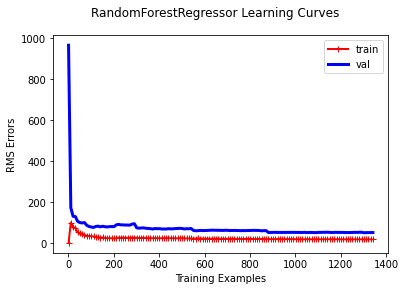

In [ ]:
plot_learning_curves(FinalModelRF, X_train, Y_train)